# L'importation des bibliothéques nécessaires

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from keras.optimizers import Optimizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# La lecture du data et la visualisation du Data

*Les données sont téléchargées sur Colab et lues dans un DataFrame pandas*

In [ ]:
from google.colab import files
import io

uploaded=files.upload()

Saving ransomware_dataset.csv to ransomware_dataset.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['ransomware_dataset.csv']))
print(data.head())

                                            FileName  \
0           0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll   
1       05c8318f98a5d301d80000009c316005.vertdll.dll   
2           06054fba-5619-4a86-a861-ffb0464bef5d.dll   
3        075822ac99a5d301660400009c316005.adhapi.dll   
4  090607dd9ba5d301ca0900009c316005.SensorsNative...   

                            md5Hash  Machine  DebugSize  DebugRVA  \
0  79755c51e413ed3c6be4635fd729a6e1      332          0         0   
1  95e19f3657d34a432eada93221b0ea16    34404         84    121728   
2  85c32641d77a54e19ba8ea4ab305c791      332          0         0   
3  62e3b959d982ef534b66f819fe15f085    34404         84     19904   
4  ae38c5f7d313ad0ff3bfb8826476767f    34404         84     97728   

   MajorImageVersion  MajorOSVersion  ExportRVA  ExportSize  IatVRA  \
0                  0               4          0           0    8192   
1                 10              10     126576        4930       0   
2                  0               

*Une description sur chaque colonne (chaque features)*

In [ ]:
print(data.describe())

            Machine     DebugSize      DebugRVA  MajorImageVersion  \
count  78556.000000  7.855600e+04  7.855600e+04       78556.000000   
mean    9482.336753  2.058922e+04  1.810962e+05          73.011597   
std    15113.745853  5.762681e+06  1.793627e+06        1225.034991   
min        0.000000  0.000000e+00  0.000000e+00           0.000000   
25%      332.000000  0.000000e+00  0.000000e+00           0.000000   
50%      332.000000  2.800000e+01  4.096000e+03           0.000000   
75%    34404.000000  5.600000e+01  3.276800e+04           8.000000   
max    43620.000000  1.615155e+09  2.852127e+08       63325.000000   

       MajorOSVersion     ExportRVA    ExportSize        IatVRA  \
count    78556.000000  7.855600e+04  7.855600e+04  7.855600e+04   
mean         5.867661  7.968689e+05  3.266691e+05  1.922440e+05   
std          2.692333  3.372625e+07  2.543482e+07  1.436287e+06   
min          0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%          4.000000  0.000000e+0

**Répartition des fichiers sains et infectés**\
\
*On utilise Seaborn pour afficher la répartition des fichiers bénins et infectés.*

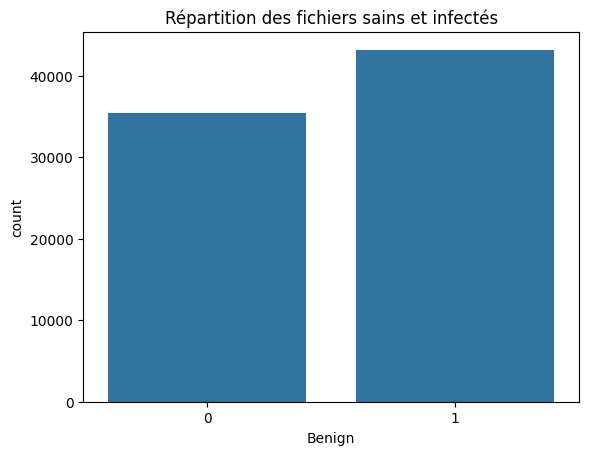

In [ ]:
sns.countplot(x='Benign', data=data)
plt.title('Répartition des fichiers sains et infectés')
plt.show()

# La matrice de Corrélation

**Corrélation entre les variables numériques**\
\
*On visualise la matrice de corrélation des variables numériques pour identifier les relations entre elles.*

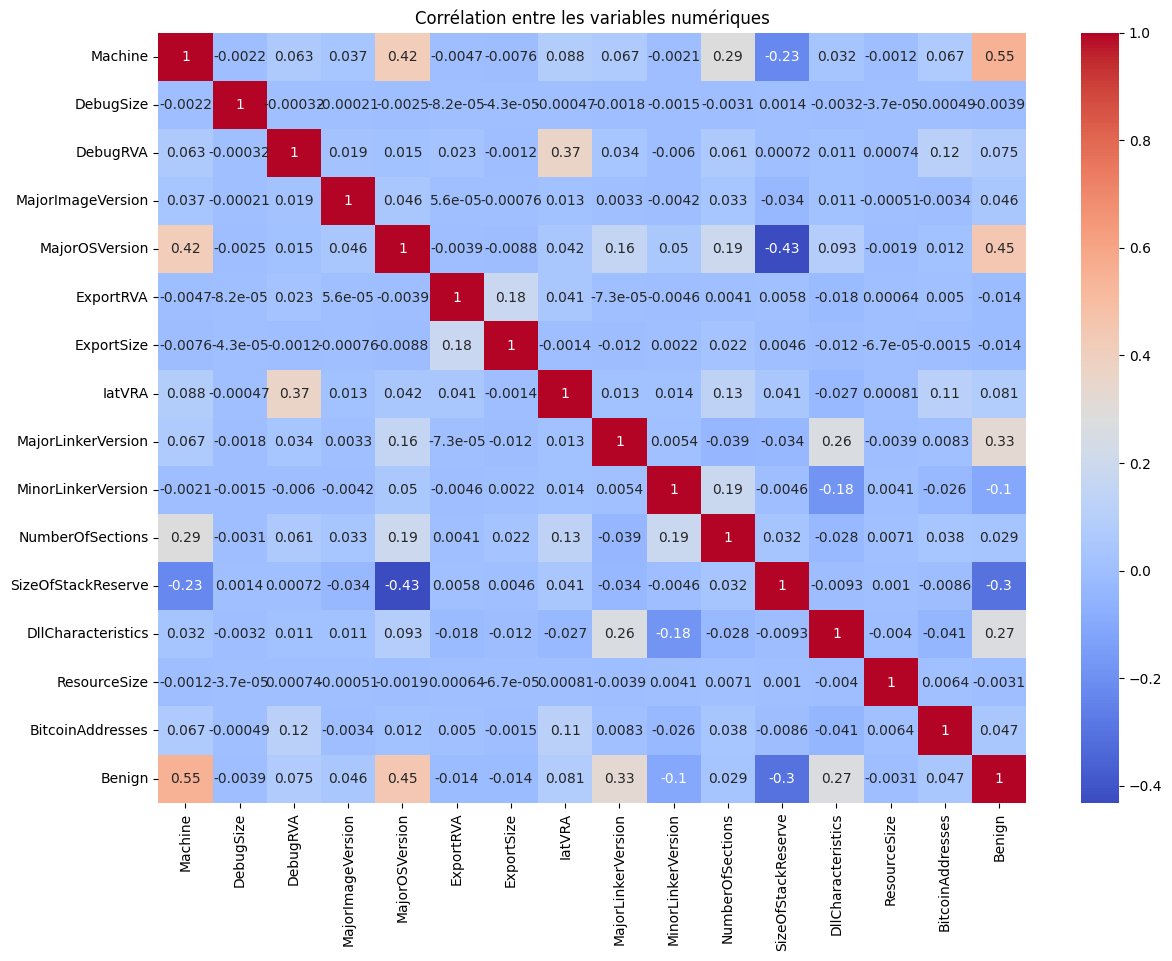

In [ ]:
numeric_cols = data.select_dtypes(include=['number'])

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Corrélation entre les variables numériques')
plt.show()


# La séparation et la division du Data

**Séparation des caractéristiques et de la variable cible**\
\
*On sépare les caractéristiques (features) de la variable cible (label).*

In [ ]:
X = data.drop(['FileName', 'md5Hash', 'Benign'], axis=1)
feature_names = X.columns
y = data['Benign']

**Normalisation des caractéristiques**\
\
*Les données sont normalisées pour améliorer les performances du modèle.*

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Division des données en ensembles d'entraînement, de validation et de test**\
\
*On divise les données en ensembles d'entraînement, de validation et de test.*

In [ ]:
X_train_initial, X_test, y_train_initial, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_initial, y_train_initial, test_size=0.2, random_state=42)

# La génération du modéle

**Reshape des données pour les adapter à l'entrée de SimpleRNN**\
\
*Les données sont reshaped pour correspondre aux exigences d'entrée du modèle RNN.*\
\
**Construction du modèle RNN**\
\
*On construit un modèle RNN avec une couche SimpleRNN et une couche Dense de sortie.*

In [ ]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val_reshaped = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

model = Sequential([
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])


**Compilation et entraînement du modèle**\
\
*Le modèle est compilé avec une fonction de perte binaire et métrique de précision, puis entraîné.*

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=10, batch_size=64)

Epoch 1/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8985 - loss: 0.2422 - val_accuracy: 0.9406 - val_loss: 0.1610
Epoch 2/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9688 - loss: 0.0998 - val_accuracy: 0.9660 - val_loss: 0.1209
Epoch 3/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9737 - loss: 0.0861 - val_accuracy: 0.9683 - val_loss: 0.0962
Epoch 4/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9758 - loss: 0.0798 - val_accuracy: 0.9784 - val_loss: 0.0746
Epoch 5/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9779 - loss: 0.0751 - val_accuracy: 0.9784 - val_loss: 0.0716
Epoch 6/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9783 - loss: 0.0731 - val_accuracy: 0.9796 - val_loss: 0.0672
Epoch 7/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9785 - loss: 0.0706 - val_accuracy: 0.9807 - val_loss: 0.0682
Epoch 8/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9808 - loss: 0.0645 - val_accuracy: 0.

**Affichage des erreurs et précisions pour l'ensemble d'entraînement et de validation**\
\
*On affiche les courbes de perte et de précision pour les ensembles d'entraînement et de validation.*

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
print("L'erreur pour l'ensemble d'entraînement\n",loss)
print("L'erreur pour l'ensemble de validation\n",val_loss)

L'erreur pour l'ensemble d'entraînement
 [0.1699252873659134, 0.09657938778400421, 0.08547826111316681, 0.07803789526224136, 0.07464530318975449, 0.071116141974926, 0.06877768784761429, 0.06654950231313705, 0.06476468592882156, 0.06190869212150574]
L'erreur pour l'ensemble de validation
 [0.1610252559185028, 0.12085297703742981, 0.09619755297899246, 0.07456356287002563, 0.07159159332513809, 0.06720443069934845, 0.0681818276643753, 0.06410970538854599, 0.06958886981010437, 0.06824836134910583]


In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print("La précision pour l'ensemble d'entraînement\n",accuracy)
print("La précision pour l'ensemble de validation\n",val_accuracy)

La précision pour l'ensemble d'entraînement
 [0.9371854662895203, 0.970044732093811, 0.97396320104599, 0.9767478704452515, 0.9777026176452637, 0.9788562655448914, 0.9789557456970215, 0.980049729347229, 0.9806862473487854, 0.9817802309989929]
La précision pour l'ensemble de validation
 [0.9405680894851685, 0.9660274982452393, 0.9682552218437195, 0.9783594608306885, 0.9784390330314636, 0.9796324372291565, 0.9806666970252991, 0.9804280400276184, 0.9767682552337646, 0.982337474822998]


**Analyse des poids du modèle**\
\
*On affiche les poids des caractéristiques les plus importants du modèle.*

In [ ]:
selected_features = ['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion',
                     'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
                     'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize',
                     'BitcoinAddresses']
# Après l'entraînement du modèle
weights = model.layers[0].get_weights()[0]  # Récupérer les poids de la couche SimpleRNN

# Afficher les poids associés à chaque feature
for i, feature in enumerate(selected_features):
    feature_weights = weights[:, i]
    for j, weight in enumerate(feature_weights):
        if weight > 0.1:
            print(f"Feature: {feature}")
            print(f"  Weight {j+1}: {weight}")


Feature: Machine
  Weight 1: 0.7518270015716553
Feature: MajorOSVersion
  Weight 1: 0.6256341338157654
Feature: IatVRA
  Weight 1: 0.30893829464912415
Feature: MajorLinkerVersion
  Weight 1: 0.5282914638519287
Feature: MinorLinkerVersion
  Weight 1: 0.13947047293186188
Feature: ResourceSize
  Weight 1: 0.48555639386177063
Feature: BitcoinAddresses
  Weight 1: 0.10647473484277725


# Évaluation de la performance

**Prédictions sur l'ensemble de test et calcul des métriques**\
\
*On évalue les performances du modèle sur l'ensemble de test en utilisant diverses métriques.*

In [ ]:
test_predictions = model.predict(X_test)
test_predictions_classes = (test_predictions > 0.5).astype(int)

491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
accuracy = accuracy_score(y_test, test_predictions_classes)
precision = precision_score(y_test, test_predictions_classes)
recall = recall_score(y_test, test_predictions_classes)
f1 = f1_score(y_test, test_predictions_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Rappel:", recall)
print("F-mesure:", f1)

Accuracy: 0.9822428716904277
Precision: 0.9865191842378154
Rappel: 0.9814305364511692
F-mesure: 0.983968281330805


# La matrice du confusion

**Affichage de la matrice de confusion**\
\
*On affiche la matrice de confusion pour mieux comprendre les erreurs de classification.*

In [ ]:
classification_report_result = classification_report(y_test, test_predictions_classes)

# Afficher le rapport de classification
print("Rapport de classification:\n", classification_report_result)

Rapport de classification:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      6988
           1       0.99      0.98      0.98      8724

    accuracy                           0.98     15712
   macro avg       0.98      0.98      0.98     15712
weighted avg       0.98      0.98      0.98     15712



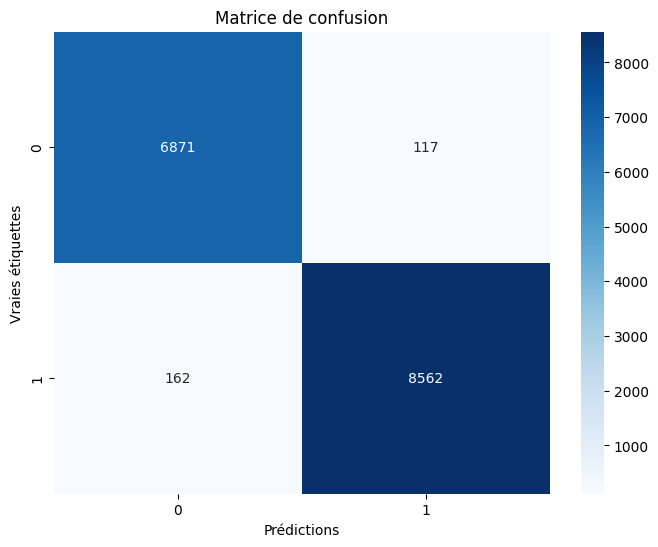

In [ ]:
conf_matrix = confusion_matrix(y_test, test_predictions_classes)

# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

# Optimisation du modèle

**Affichage de la matrice de confusion**\
\
*On affiche la matrice de confusion pour mieux comprendre les erreurs de classification.*

**Configuration et exécution de GridSearchCV pour optimiser les hyperparamètres**\
\
*On utilise GridSearchCV pour trouver les meilleurs hyperparamètres pour le modèle.*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import Adam, SGD

# Définir la fonction de création du modèle
def create_model(optimizer=Adam):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer(), metrics=['accuracy'])
    return model

# Créer le modèle KerasClassifier
model = KerasClassifier(model=create_model, epochs=10, batch_size=64, verbose=0)

# Définir les hyperparamètres à optimiser
param_grid = {
    'optimizer': [Adam, SGD],
    'loss': ['binary_crossentropy', 'categorical_crossentropy'],
    'batch_size': [32, 64, 128],
    'class_weight': [None, 'balanced']
}


# Effectuer la recherche par grille
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=None, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_val, y_val))

# Afficher les meilleurs paramètres
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these 

Best: 0.982536 using {'batch_size': 32, 'class_weight': None, 'loss': 'binary_crossentropy', 'optimizer': <class 'keras.src.optimizers.adam.Adam'>}


**Évaluation du modèle optimisé**\
\
*On évalue les performances du meilleur modèle trouvé par GridSearchCV.*

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5621
           1       0.99      0.98      0.98      6948

    accuracy                           0.98     12569
   macro avg       0.98      0.98      0.98     12569
weighted avg       0.98      0.98      0.98     12569

Confusion Matrix:


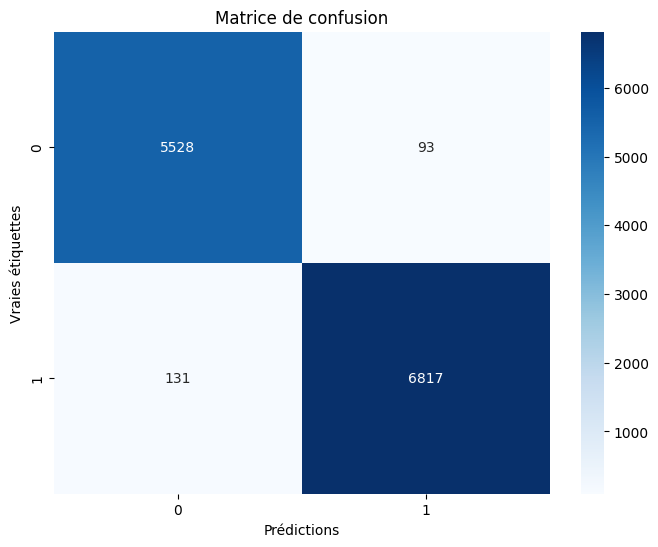

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


best_model = grid_result.best_estimator_

# Obtenir les prédictions sur les données de validation
y_pred = best_model.predict(X_val)

# Afficher les métriques de performance
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
confusion=confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()